In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import requests

import tweepy

from io import StringIO

In [2]:
# Assuming 'df' is your existing DataFrame
df = pd.DataFrame(columns=['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp'])

def get_tweets_from_github(url, df, count=None):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
        return df  # Return the original DataFrame if there's an error

    # Read CSV data from the GitHub raw content URL
    csv_data = response.text.strip()
    if not csv_data:
        print("The CSV file is empty.")
        return df

    # Parse CSV data into a DataFrame
    data = pd.read_csv(StringIO(csv_data))

    # Extract and format required columns
    df['Tweet_ID'] = data['Tweet_ID']
    df['Username'] = data['Username']
    df['Text'] = data['Text']
    df['Retweets'] = data['Retweets']
    df['Likes'] = data['Likes']
    # df['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d-%m-%Y %H:%M') # Assuming 'Timestamp' is in datetime format

    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    format1 = '%d-%m-%Y %H:%M'
    format2 = '%Y-%m-%d %H:%M:%S%z'

    df['Timestamp'] = df['Timestamp'].combine_first(
    pd.to_datetime(df['Timestamp'], format=format2, errors='coerce')
)

    # Save DataFrame to CSV (optional)
    df.to_csv("TweetDataset1.csv", index=False)

    # Return the updated DataFrame
    return df


In [3]:
# Replace 'yourusername', 'yourrepository', and 'yourfile.csv' with your GitHub details
github_raw_url = "https://raw.githubusercontent.com/hacker-kun/Dataset/main/twdataset1.csv"

# Call the function with the GitHub raw URL, existing DataFrame 'df', and desired count
df = get_tweets_from_github(github_raw_url, df, count=None)


In [4]:
# Print the updated DataFrame
print(df.head(10))


   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   
5         6  ramirezmikayla   
6         7     fieldsbrian   
7         8           jgood   
8         9     turneredgar   
9        10    audreymooney   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   
5  Cell without report weight. Could father chang...        22     75   
6  Receive difference their. Responsibility build...        12     43   
7  Five sort guy why politics than. Somebody pret...         0     12   
8

In [5]:
# Print the updated DataFrame
display(df.head(10))


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,NaT
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,NaT
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,NaT
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,NaT
4,5,carlwarren,Involve sense former often approach government...,27,80,NaT
5,6,ramirezmikayla,Cell without report weight. Could father chang...,22,75,NaT
6,7,fieldsbrian,Receive difference their. Responsibility build...,12,43,NaT
7,8,jgood,Five sort guy why politics than. Somebody pret...,0,12,NaT
8,9,turneredgar,Reveal table state view manager she. Fly yeah ...,15,26,NaT
9,10,audreymooney,List allow family rather continue. Agency mess...,97,28,NaT


In [6]:
import re

def clean_tweets(text):
    # Using regular expressions to substitute or remove specific patterns in the tweet text
    cleaned_tweet = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])',
        ' ',
        str(text).lower()
    )

    # Split the cleaned tweet into words and join them back into a string
    cleaned_tweet = ' '.join(cleaned_tweet.split())

    return cleaned_tweet


In [7]:
# call the function to get clean tweets

df['Clean Tweets']=df['Text'].apply(lambda x:clean_tweets(x))
df.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Clean Tweets
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,NaT,party least receive say or single prevent prev...
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,NaT,hotel still congress may member staff media dr...
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,NaT,nice be her debate industry that year film whe...
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,NaT,laugh explain situation career occur serious f...
4,5,carlwarren,Involve sense former often approach government...,27,80,NaT,involve sense former often approach government...


In [29]:
df.rename(columns={'text': 'tweet'}, inplace=True)

In [10]:
# function to analyze sentiments 

from textblob import TextBlob
def sentiment_analyze(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'positive'
    elif analysis.sentiment.polarity==0:
        return 'neutral'
    else:
        return 'negative'

In [11]:
df['Sentiment']=df['Text'].apply(lambda x: sentiment_analyze(x))
df.head(10)

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Clean Tweets,Sentiment
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,NaT,party least receive say or single prevent prev...,positive
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,NaT,hotel still congress may member staff media dr...,positive
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,NaT,nice be her debate industry that year film whe...,positive
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,NaT,laugh explain situation career occur serious f...,positive
4,5,carlwarren,Involve sense former often approach government...,27,80,NaT,involve sense former often approach government...,positive
5,6,ramirezmikayla,Cell without report weight. Could father chang...,22,75,NaT,cell without report weight could father change...,positive
6,7,fieldsbrian,Receive difference their. Responsibility build...,12,43,NaT,receive difference their responsibility build ...,negative
7,8,jgood,Five sort guy why politics than. Somebody pret...,0,12,NaT,five sort guy why politics than somebody prett...,positive
8,9,turneredgar,Reveal table state view manager she. Fly yeah ...,15,26,NaT,reveal table state view manager she fly yeah d...,positive
9,10,audreymooney,List allow family rather continue. Agency mess...,97,28,NaT,list allow family rather continue agency messa...,negative


In [32]:
n=10
print("Original Tweet:\n",df['Text'][n])
print()
print('Clean Tweet:\n',df['Clean Tweets'][n])
print()
print('Sentiment of the tweet:\n',df['Sentiment'][n])

Original Tweet:
 Image simply article list event imagine want reach. Floor best west human American plant. Board scientist party suggest exactly.
Computer product one.

Clean Tweet:
 image simply article list event imagine want reach floor best west human american plant board scientist party suggest exactly computer product one

Sentiment of the tweet:
 positive


In [12]:
Topic = "president"  # Specify your desired topic here

# Print total tweets for the specified topic
print("Total tweets extracted for topic '{}': {}".format(Topic, len(df[df['Text'].str.contains(Topic, case=False)])))

# Print sentiment distribution for the specified topic
print("Sentiment distribution:")
print("Total Positive Tweets: {}".format(len(df[(df['Sentiment'] == 'positive') & (df['Text'].str.contains(Topic, case=False))])))
print("Total Neutral Tweets: {}".format(len(df[(df['Sentiment'] == 'neutral') & (df['Text'].str.contains(Topic, case=False))])))
print("Total Negative Tweets: {}".format(len(df[(df['Sentiment'] == 'negative') & (df['Text'].str.contains(Topic, case=False))])))


Total tweets extracted for topic 'president': 353
Sentiment distribution:
Total Positive Tweets: 256
Total Neutral Tweets: 10
Total Negative Tweets: 87


In [34]:
df['Sentiment'].value_counts()

Sentiment
positive    7794
negative    2072
neutral      234
Name: count, dtype: int64

Text(0.5, 1.0, 'Summary of counts for total tweets')

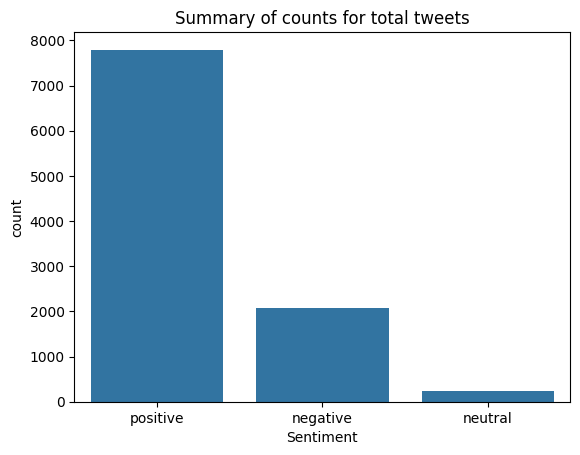

In [35]:
sns.countplot(x=df['Sentiment'])
plt.title("Summary of counts for total tweets")

([<matplotlib.patches.Wedge at 0x21926c6b1f0>,
 [Text(-0.9043169353928799, 0.7888034484975519, 'Positive'),
  Text(0.8445598566946912, -0.8524779460254926, 'Negative'),
  Text(1.196822768242599, -0.0872654651974237, 'Neutral')],
 [Text(-0.5275182123125133, 0.4601353449569053, '77.17%'),
  Text(0.4926599164052365, -0.49727880184820406, '20.51%'),
  Text(0.6981466148081825, -0.050904854698497155, '2.32%')])

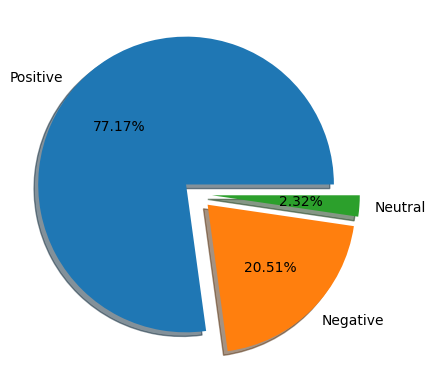

In [36]:
a=len(df[df['Sentiment']=='positive'])
b=len(df[df['Sentiment']=='negative'])
c=len(df[df['Sentiment']=='neutral'])
d=np.array([a,b,c])
explode=(0.1,0.1,0.1)
plt.pie(d,labels=['Positive','Negative','Neutral'],shadow=True,autopct='%1.2f%%',explode=explode)

In [37]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

Tweet at index 80:
goal perhaps beat such whole under artist one red break camera yourself country time fill among reason bank much low improve raise cold hard


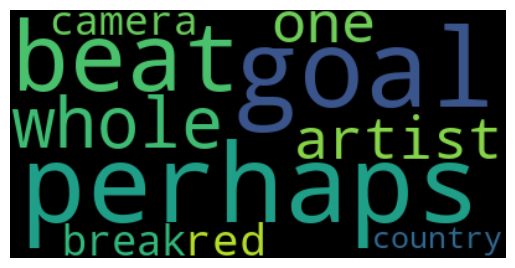

In [38]:
# start with one review

text=df['Clean Tweets'][80]

print("Tweet at index 80:")
print(text)
wordcloud=WordCloud(max_words=10).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
# Function to preprocess data for wordcloud

def prepcloud(Topic_text,Topic):
    Topic=str(Topic).lower()
    Topic=' '.join(re.sub('[^0-9A-Za-z \t]',' ',Topic).split())
    Topic=re.split("\s+",str(Topic))
    stopwords=set(STOPWORDS)
    stopwords.update('Topic') #Add our topic in Stopwords, so it doesnt appear in wordCloud

    text_new=" ".join(txt for txt in Topic_text.split() if txt not in stopwords)
    return text_new

There are 2229250 words in the combination of all review


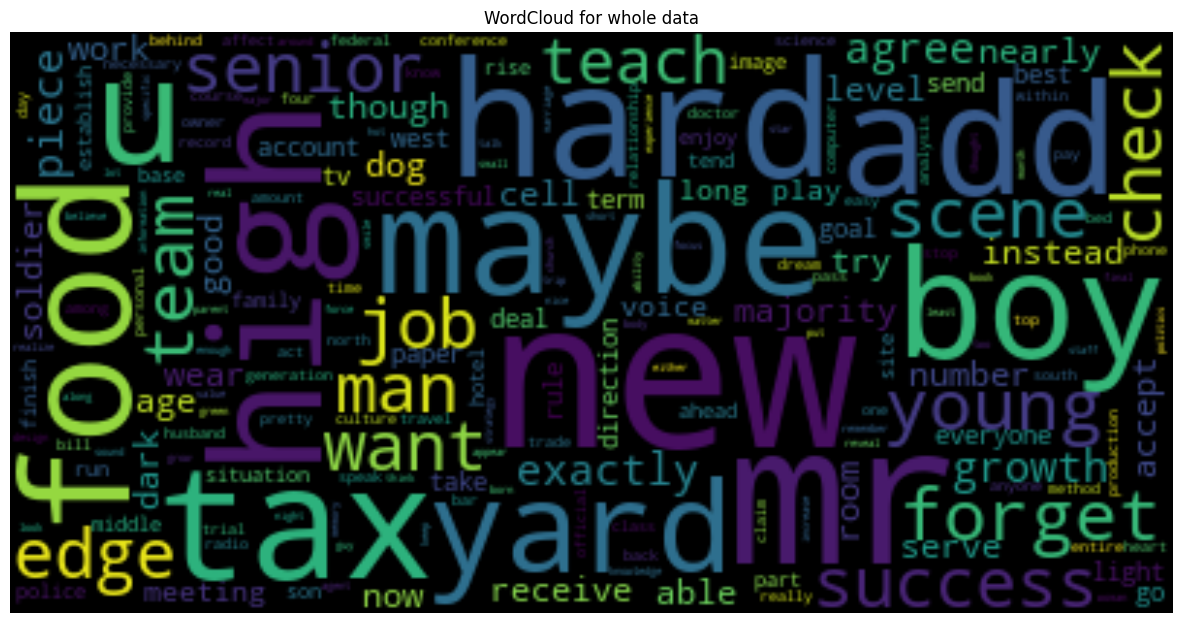

In [40]:
# wordcloud for whole data

text=" ".join(review for review in df['Clean Tweets'])
print("There are {} words in the combination of all review".format(len(text)) )

# create stopwords list
stopwords=set(STOPWORDS)

text_newALL=prepcloud(text,Topic)
wordcloud=WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('WordCloud for whole data')
plt.axis("off")
plt.show()

There are 2229250 words in the combination of all review


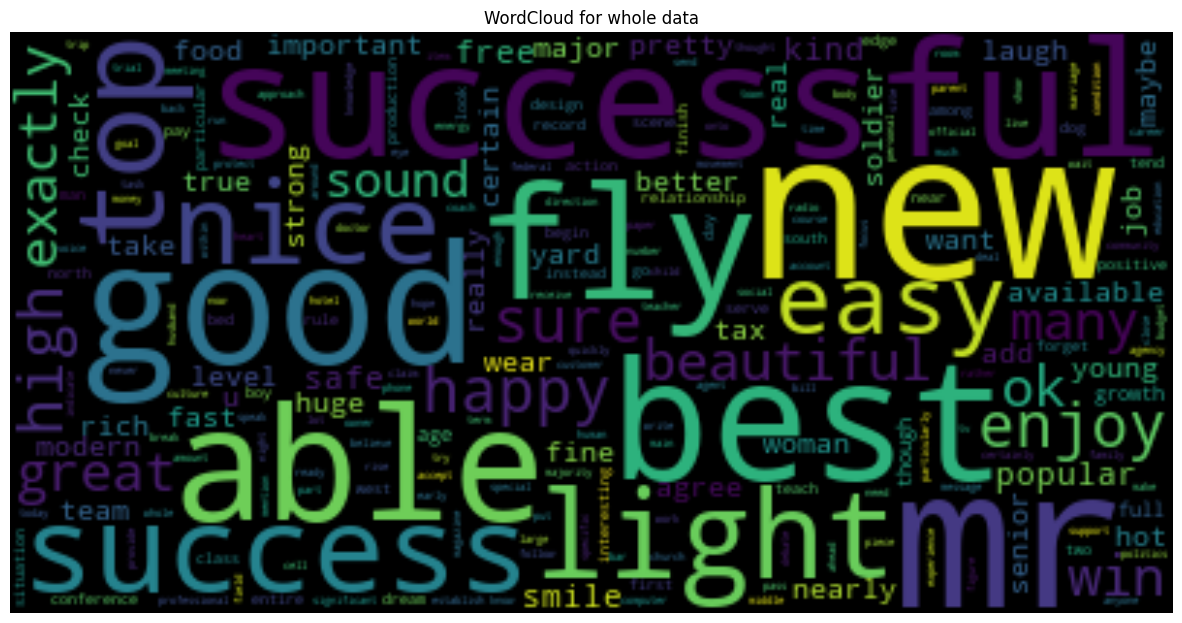

In [41]:
# wordcloud for positive tweets only

text_positive=" ".join(review for review in df[df['Sentiment']=='positive']['Clean Tweets'])
print("There are {} words in the combination of all review".format(len(text)) )

# create stopwords list
stopwords=set(STOPWORDS)

text_newALL=prepcloud(text_positive,Topic)
wordcloud=WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('WordCloud for whole data')
plt.axis("off")
plt.show()

There are 454336 words in the combination of all negative tweets


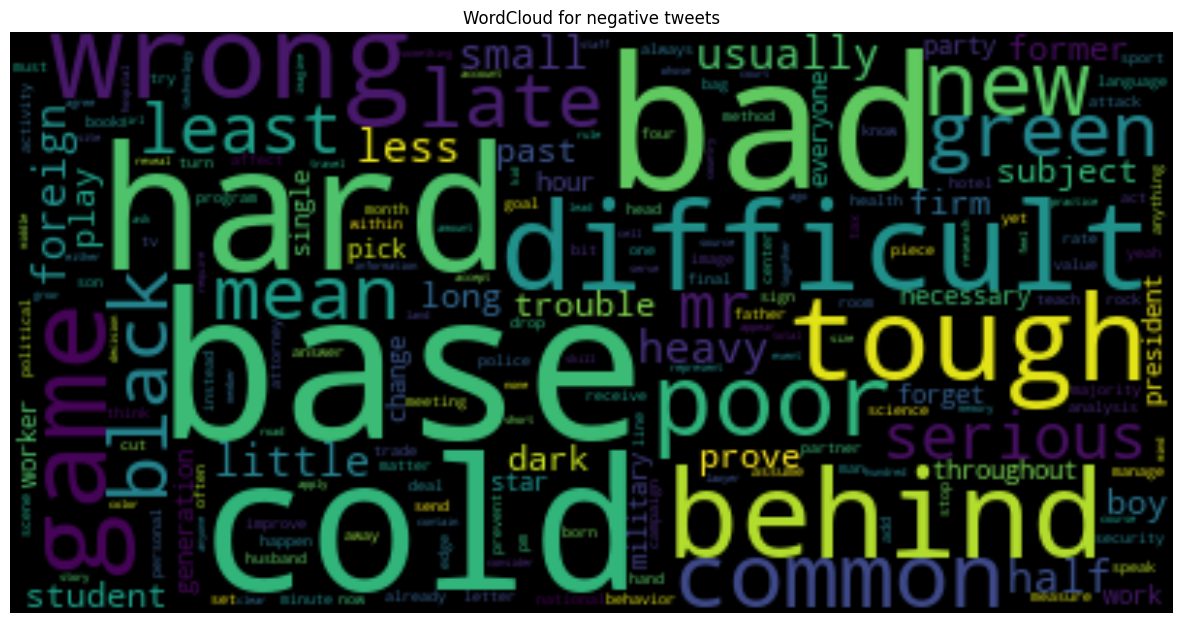

In [42]:
# Wordcloud for negative tweets only

# Extracting Negative Tweets
text_negative = " ".join(review for review in df[df['Sentiment'] == 'negative']['Clean Tweets'])

# Printing Word Count
print("There are {} words in the combination of all negative tweets".format(len(text_negative)))

# Creating Stopwords
stopwords = set(STOPWORDS)

# Preprocessing Text for Word Cloud
text_new_negative = prepcloud(text_negative, Topic)

# Generating Word Cloud
wordcloud_negative = WordCloud(stopwords=stopwords, max_words=800, max_font_size=70).generate(text_new_negative)

# Displaying Word Cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('WordCloud for negative tweets')
plt.axis("off")
plt.show()


In [43]:
df1 = pd.DataFrame(columns=['Username', 'Text', 'Retweets', 'Likes', 'Timestamp'])

In [44]:
def get_tweets_from_user(df, count_tweet=200):

    for i in range(min(count_tweet, len(df))):
        tweet = df.iloc[i]
        df1.loc[i, 'Username'] = tweet['Username']
        df1.loc[i, 'Text'] =     tweet['Text']
        df1.loc[i, 'Retweets'] = tweet['Retweets']
        df1.loc[i, 'Likes'] =    tweet['Likes']
        df1.loc[i, 'Timestamp'] =tweet['Timestamp']

        # Optional: Save DataFrame to CSV after each iteration if needed
        df1.to_csv("TweetDataset2.csv", index=False)

    return df1




In [45]:
# Filter the DataFrame for the specific user
user_tweets_df = df[df['Username'] == 'imsrk']

# Call the function with the filtered DataFrame
result_df = get_tweets_from_user(user_tweets_df, count_tweet=200)

In [46]:
df1.head(10)

,Username,Text,Retweets,Likes,Timestamp
0,imsrk,Locked &amp; loaded. Meet @TheJohnAbraham in #...,6976,46524,NaT
1,imsrk,He’s tough and plays it rough! Presenting @The...,6203,29311,NaT
2,imsrk,Teaching the young ones at home the essence an...,14334,112343,NaT
3,imsrk,Been working the last few days non stop….so ne...,4857,37383,NaT
4,imsrk,Lil one I am also so anxious that u shared the...,3876,27351,NaT
5,imsrk,"#Darlings, yeh trailer misses mat karna, warna...",2978,15631,NaT
6,imsrk,Guns and grace galore. @deepikapadukone is all...,5845,35270,NaT
7,imsrk,She doesn’t need a bullet to kill you! Present...,5884,28626,NaT
8,imsrk,https://t.co/OUmSJPEC1Y,2340,17041,NaT
9,imsrk,"Funny, dark, quirky, mendak, bichoo and to top...",3874,24719,NaT


In [47]:
df1['Clean Tweets']=df1['Text'].apply(lambda x:clean_tweets(x))
df1.head()

,Username,Text,Retweets,Likes,Timestamp,Clean Tweets
0,imsrk,Locked &amp; loaded. Meet @TheJohnAbraham in #...,6976,46524,NaT,locked amp loaded meet in pathaan celebrate pa...
1,imsrk,He’s tough and plays it rough! Presenting @The...,6203,29311,NaT,he s tough and plays it rough presenting in pa...
2,imsrk,Teaching the young ones at home the essence an...,14334,112343,NaT,teaching the young ones at home the essence an...
3,imsrk,Been working the last few days non stop….so ne...,4857,37383,NaT,been working the last few days non stop so nee...
4,imsrk,Lil one I am also so anxious that u shared the...,3876,27351,NaT,lil one i am also so anxious that u shared the...


In [48]:
df1['Sentiment']=df1['Text'].apply(lambda x: sentiment_analyze(x))
df1.head(10)

,Username,Text,Retweets,Likes,Timestamp,Clean Tweets,Sentiment
0,imsrk,Locked &amp; loaded. Meet @TheJohnAbraham in #...,6976,46524,NaT,locked amp loaded meet in pathaan celebrate pa...,positive
1,imsrk,He’s tough and plays it rough! Presenting @The...,6203,29311,NaT,he s tough and plays it rough presenting in pa...,negative
2,imsrk,Teaching the young ones at home the essence an...,14334,112343,NaT,teaching the young ones at home the essence an...,positive
3,imsrk,Been working the last few days non stop….so ne...,4857,37383,NaT,been working the last few days non stop so nee...,positive
4,imsrk,Lil one I am also so anxious that u shared the...,3876,27351,NaT,lil one i am also so anxious that u shared the...,positive
5,imsrk,"#Darlings, yeh trailer misses mat karna, warna...",2978,15631,NaT,darlings yeh trailer misses mat karna warna tu...,neutral
6,imsrk,Guns and grace galore. @deepikapadukone is all...,5845,35270,NaT,guns and grace galore is all that and more cel...,positive
7,imsrk,She doesn’t need a bullet to kill you! Present...,5884,28626,NaT,she doesn t need a bullet to kill you presenti...,positive
8,imsrk,https://t.co/OUmSJPEC1Y,2340,17041,NaT,,neutral
9,imsrk,"Funny, dark, quirky, mendak, bichoo and to top...",3874,24719,NaT,funny dark quirky mendak bichoo and to top it ...,positive


In [49]:
# Assuming 'Sentiment' column contains values 'positive', 'neutral', or 'negative'
sentiment_summary = df1[df1['Username'] == 'imsrk']['Sentiment'].value_counts()



In [50]:
print(f"Sentiment Summary for User :")
print(f"Number of Positive Tweets: {sentiment_summary.get('positive', 0)}")
print(f"Number of Neutral Tweets: {sentiment_summary.get('neutral', 0)}")
print(f"Number of Negative Tweets: {sentiment_summary.get('negative', 0)}")

Sentiment Summary for User :
Number of Positive Tweets: 62
Number of Neutral Tweets: 32
Number of Negative Tweets: 6
